<img src= "https://raw.githubusercontent.com/LuisVelasc/Imagenes/main/PrincipiosVisualizacionCabecera.PNG" alt="drawing" width="400">

Notas realizadas en el curso de edX Data Science: Visualization

## Se cargan las librerías necesarias para los ejemplos

In [3]:
library(dslabs)
library(tidyverse)
library(dplyr)
library(ggplot2)
library(ggrepel)
library(RColorBrewer)

-- Attaching packages --------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.4     v dplyr   1.0.7
v tidyr   1.1.3     v stringr 1.4.0
v readr   2.0.1     v forcats 0.5.1

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



## Preferir longitudes sobre áreas y ángulos

Los seres humanos somos malos para comparar ángulos y áreas, por eso no se recomienda utilizar pie chart para presentar datos. Como ejemplo, se muestra la siguiente gráfica que representa el uso de nagevadores en el año 2000. 

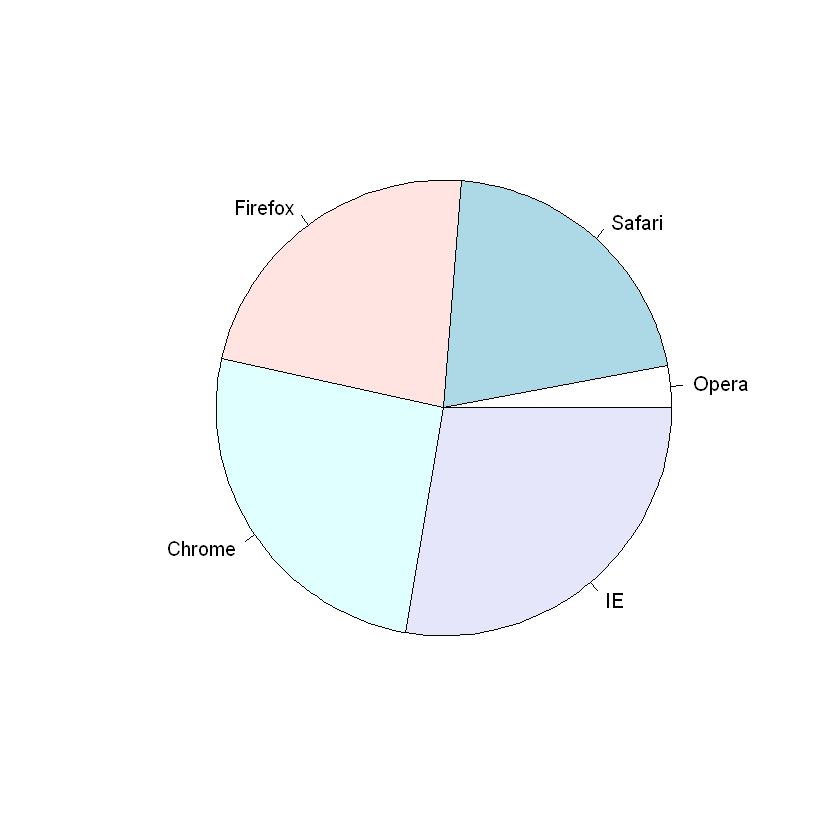

In [5]:
# Gráficos pie chart para el año 2000
pie(c(3, 21, 23, 26, 28), labels=c("Opera","Safari","Firefox","Chrome","IE"))

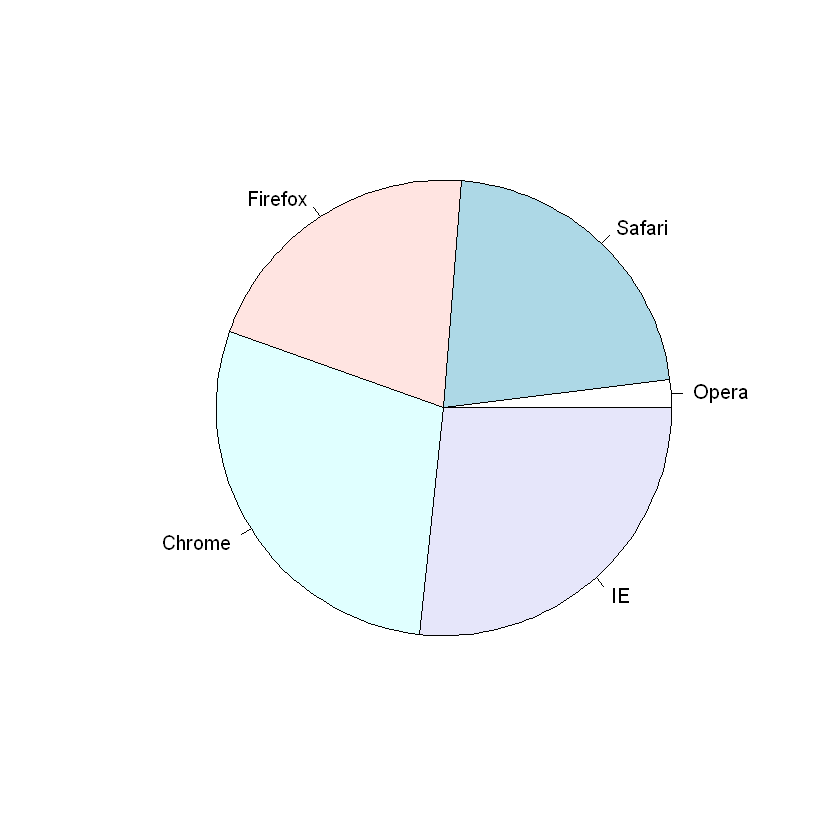

In [6]:
# Gráficos pie chart para el año 2015
pie(c(2, 22, 21, 29, 27), labels=c("Opera","Safari","Firefox","Chrome","IE"))

Al comparar ambas gráficas es difícil idenificar algún cambio entre ellas, esto se podría arreglar indicando los porcentajes pero entonces sería más conveniente presentar los datos por medio de una tabla. En la siguiente gráfica se presentan los datos por medio de barras. Se sabe que los seres humanos son mejores para comparar líneas rectas, esto hace que sea más conveniente presentar los datos de esa forma. 

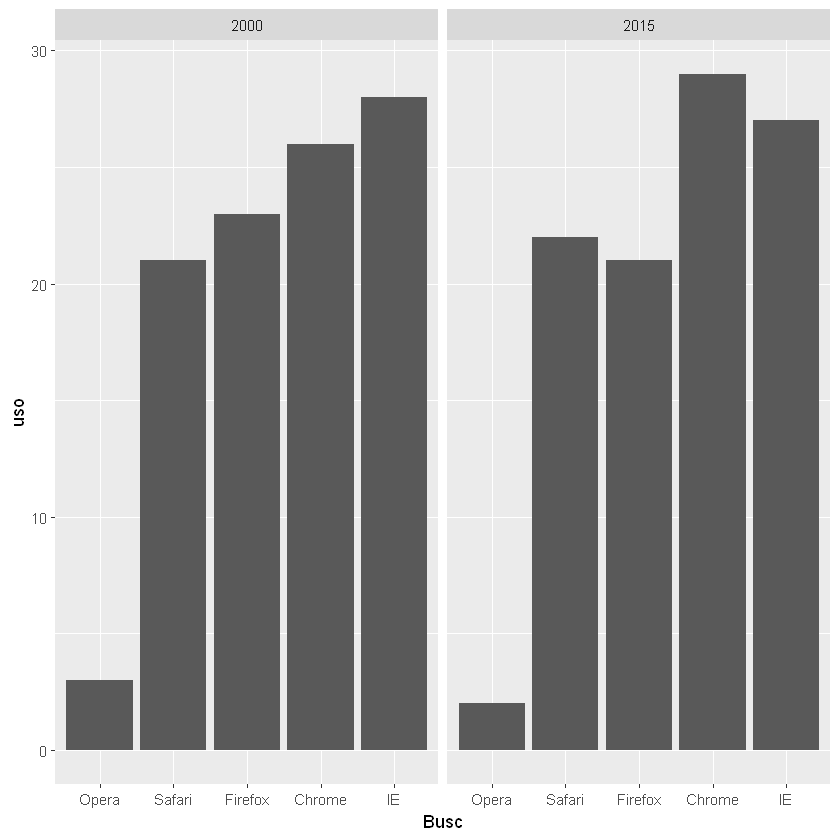

In [7]:
# En gráfica de barras
Buscador=expand.grid(Year=c("2000","2015"),Busc=c("Opera","Safari","Firefox","Chrome","IE")) %>%
  mutate(uso=c(3,2,21,22,23,21,26,29,28,27))

# Se crea el gráfico
Buscador %>%
  ggplot(aes(Busc,uso))+
  geom_col()+
  facet_grid(.~Year)

## Es engañoso no presentar el origen de coordenadas

Esta gráfica fue presentada durante las noticias de FoxNews. Representa el número de detenciones realizadas en la frontera sur de los Estados Unidos entre los años 2011 a 2013. Al no presetarse las barras desde el inicio, los datos se pueden prestar para malinterpretaciones. Tal como se presentan, pareciera que las detenciones se han incrementado por tres en el periodo indicado. 

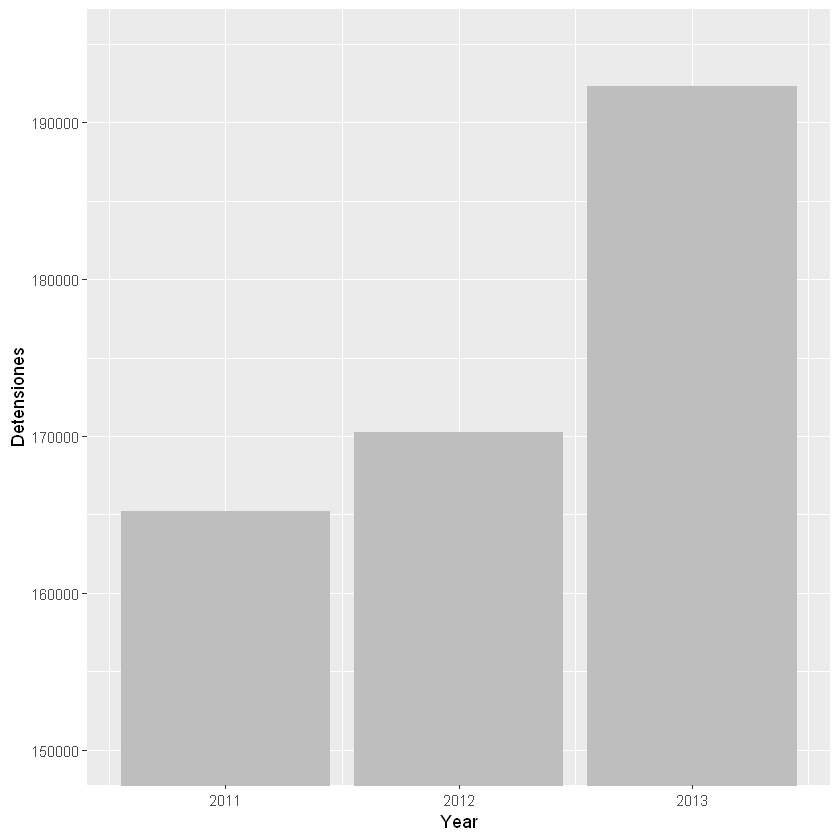

In [13]:
AFS=data.frame(Year=c(2011,2012,2013),Detensiones=c(165244,170223,192298))

# Como lo mostró FoxNews
AFS %>%
  ggplot(aes(Year,Detensiones))+
  geom_col(fill="gray")+
  coord_cartesian(ylim=c(150000,195000))

Si se presentan las barras desde cero se observa que el cambio no es tan dramatico como se le pinta. 

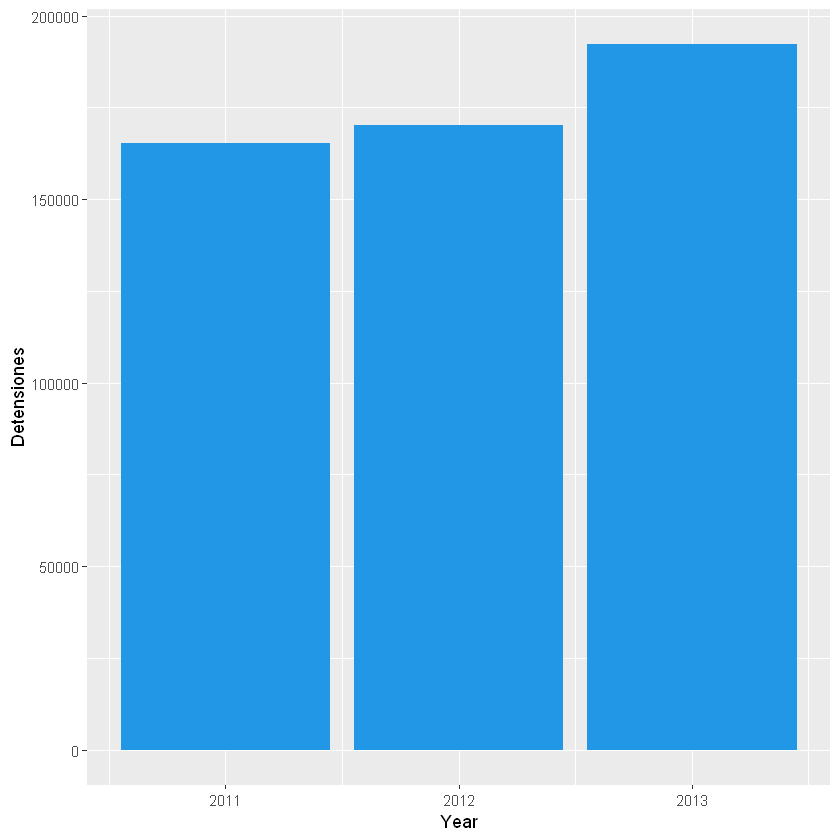

In [12]:
AFS %>%
  ggplot(aes(Year,Detensiones))+
  geom_col(fill="4EC003")

Esta regla no aplica para todos los casos, esto es particularmente cierto cuando se quieren observar diferencias entre un mismo grupo. La siguiente gráfica presenta la esperanza de vida de las personas de diferentes paises agrupados por continente, para los años 1990 y 2010. El presetar el origen de coordenadas dificulta observar cómo ha cambiado esta variable entre los paises de un mismo continente. 

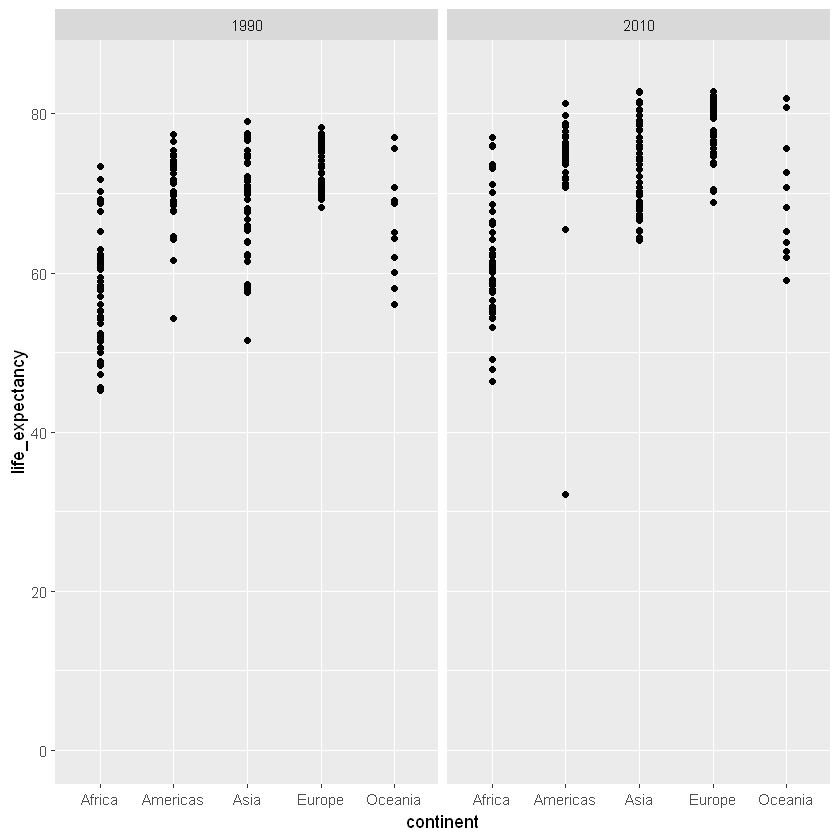

In [14]:
data("gapminder")

gapminder %>%
  filter(year %in% c(1990,2010) & !is.na(life_expectancy)) %>% 
  group_by(continent) %>%
  ggplot(aes(continent,life_expectancy))+
  geom_point()+
  coord_cartesian(ylim=c(0,85))+
  facet_grid(.~year)

Así se ve recortando el eje Y. Se observa que los paises de América incrementaron la esperanza de vida de sus habitantes en los 20 años que separan las observaciones, algo similar ocurre con Asia.

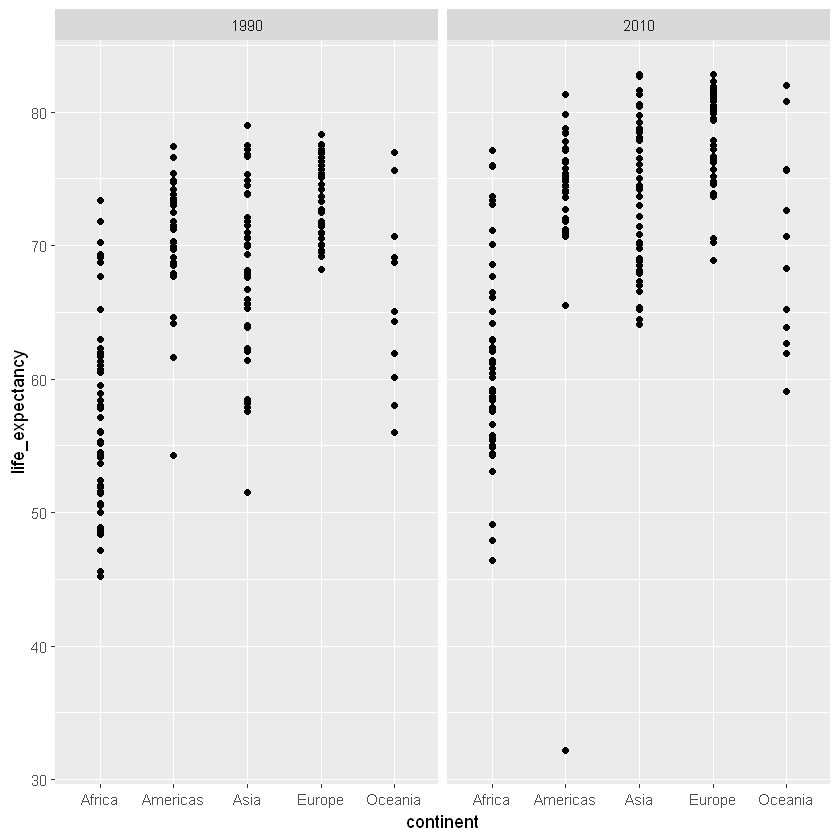

In [15]:
gapminder %>%
  filter(year %in% c(1990,2010) & !is.na(life_expectancy)) %>% 
  group_by(continent) %>%
  ggplot(aes(continent,life_expectancy))+
  geom_point()+
  facet_grid(.~year)

## Ordenar las longitudes

Se facilita mucha la interpretación de una grafica de barras cuando éstas están ordenadas. En la siguiente gráfica se presenta la incidencia de una enfermedad en los diferentes estados de los Estados Unidos. Los estados están ordenados de manera alfabética. Como se puede observar, es difícil identificar cuales estados presentan la mayor incidencia.

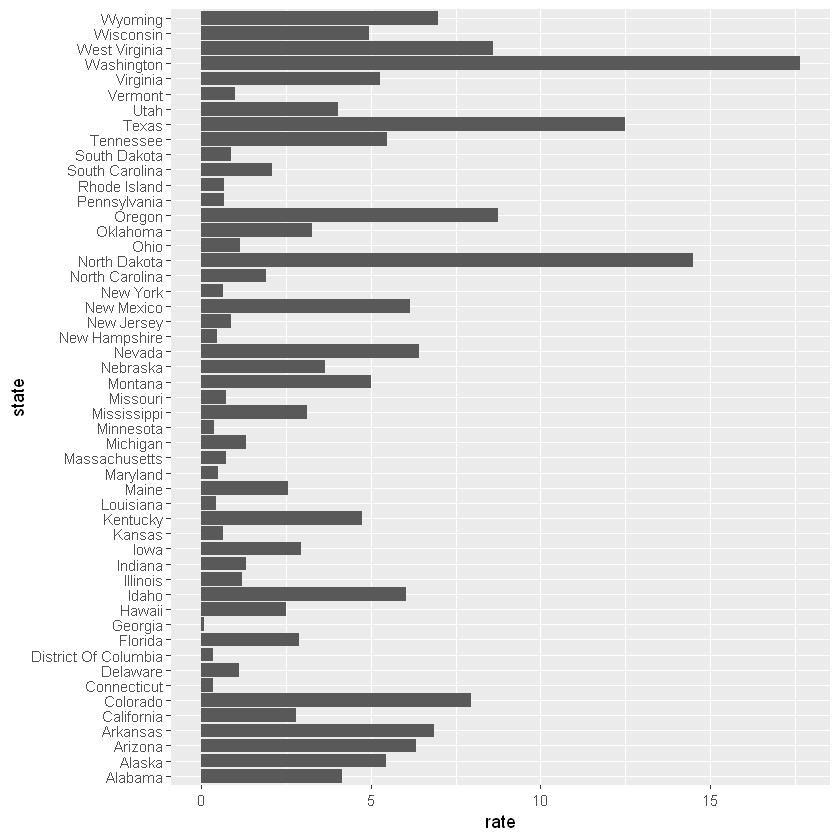

In [16]:
data(us_contagious_diseases)
us_contagious_diseases %>% 
  filter(year == 1967 & disease=="Measles" & count>0 & !is.na(population)) %>% 
  mutate(rate = count / population * 10000 * 52 / weeks_reporting) %>% 
  ggplot(aes(state, rate)) + geom_bar(stat="identity") + coord_flip()


En la siguiente gráfica los estados se han ordenado de tal manera que se observa un orden decreciente. Así es más fácil interpretar la información de la gráfica. 

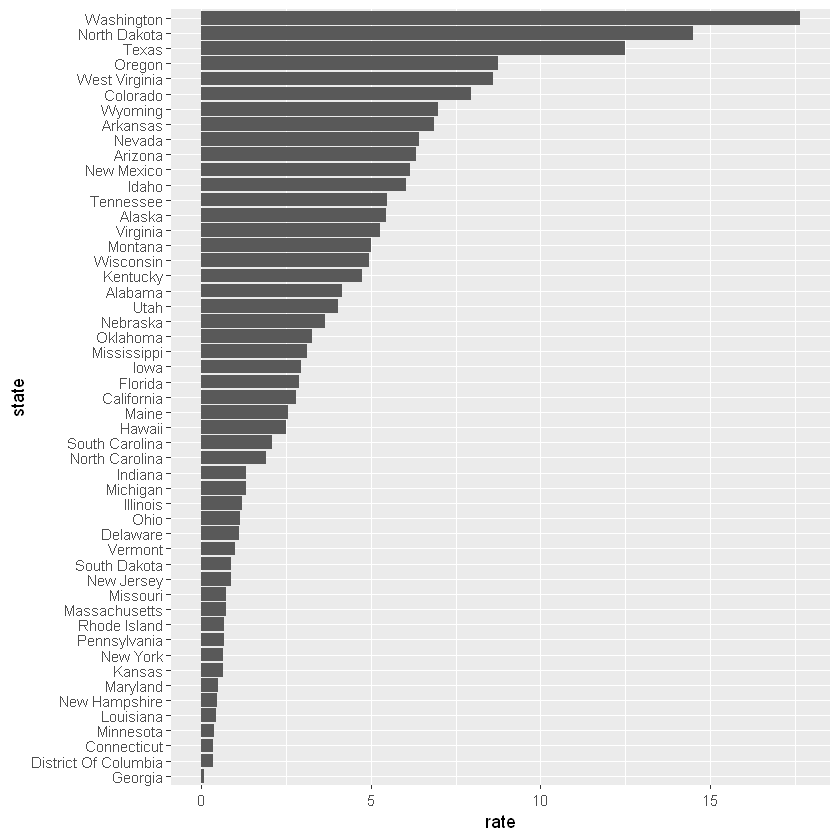

In [17]:
us_contagious_diseases %>% 
  filter(year == 1967 & disease=="Measles" & count>0 & !is.na(population)) %>% 
  mutate(rate = count / population * 10000 * 52 / weeks_reporting) %>% 
  mutate(state=reorder(state,rate)) %>% 
  ggplot(aes(state, rate)) + geom_bar(stat="identity") + coord_flip()

## Mostrar los datos

Se puede brindar un poco más de información si se muestran un poco más los datos. Considérese la siguiente gráfica que representa la altura en pulgadas de personas agrupadas por sexo. 

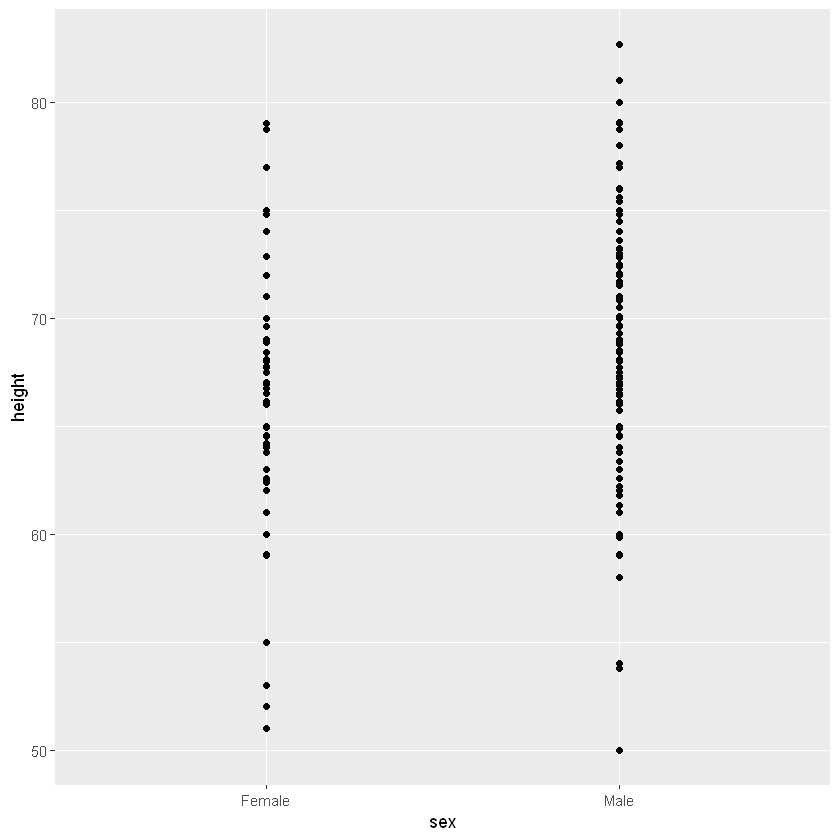

In [18]:
heights %>% ggplot(aes(sex, height)) + geom_point()

Ahora observe como se ve la gráfica si le introducimos un pequeño desplazamiento lateral a los puntos, estos no cambian de altura así que la información no se ve distorsionada. En esta forma se pueden apreciar los intervalos de altura donde más puntos caen. 

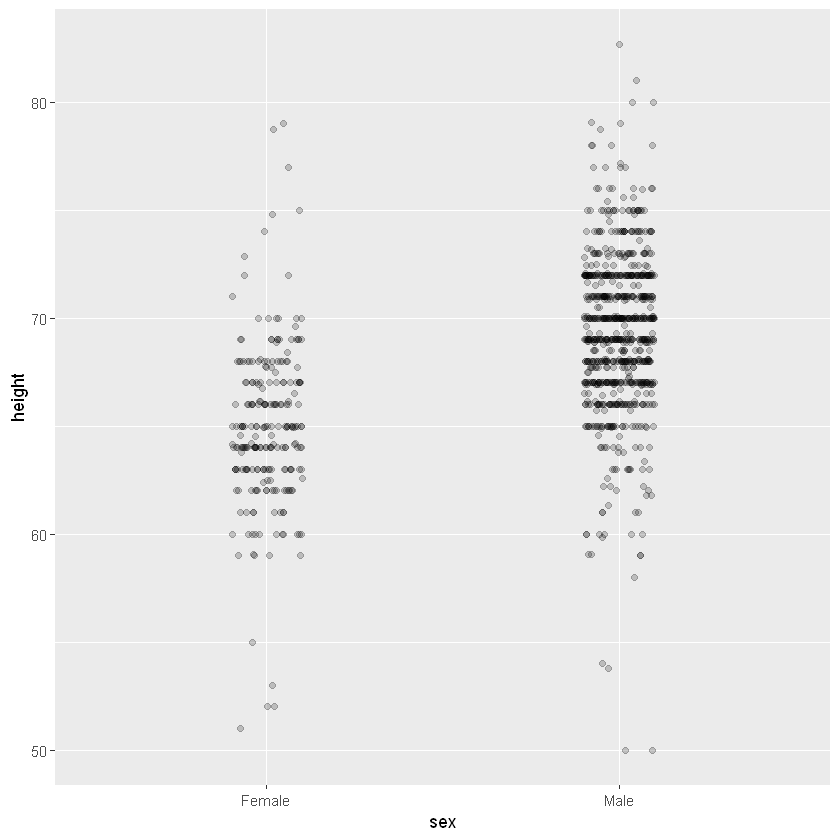

In [19]:
heights %>% ggplot(aes(sex, height)) + geom_jitter(width = 0.1, alpha = 0.2)

## Mantener las mismas dimensiones de los ejes

Las distribuciones de alturas por sexo se pueden comparar de una manera más apropiada cuando ambas manejan el mismo intervalo de ejes X.

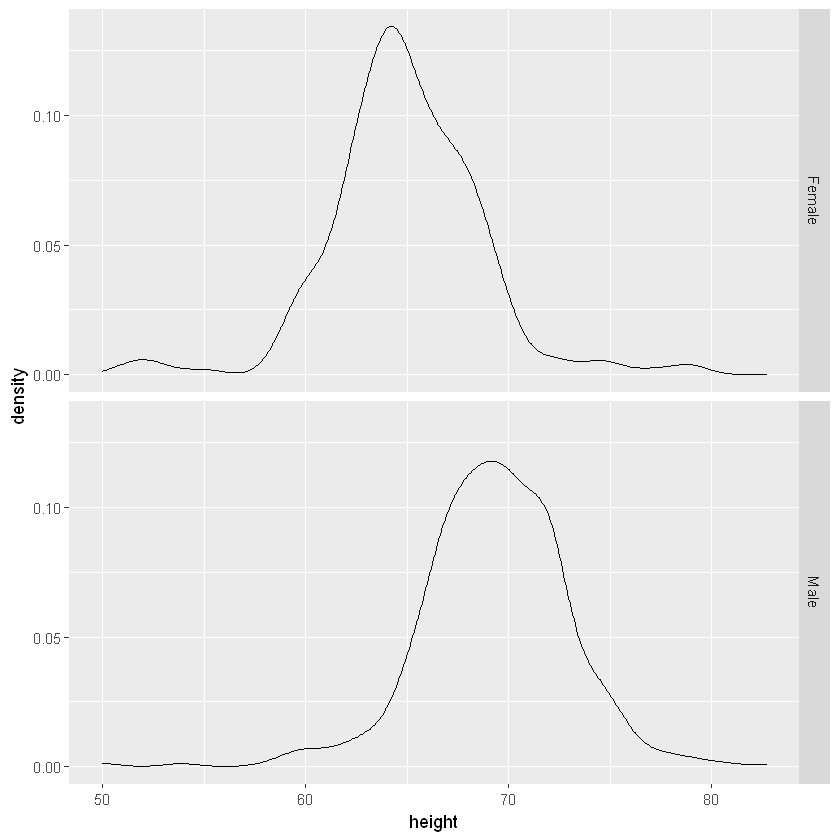

In [20]:
heights %>%
  group_by(sex) %>%
  ggplot(aes(height)) +
  geom_density()+
  facet_grid(sex~.)

## Considerar transformaciones

La siguiente gráfica muestra la población mundial acumulada por continentes para el año 2010. En esta presentación no se aprecia el peso de algunos paises como China o India en la población total de Asia, dando la impresión que todo los países de ese continente estan muy poblados. 

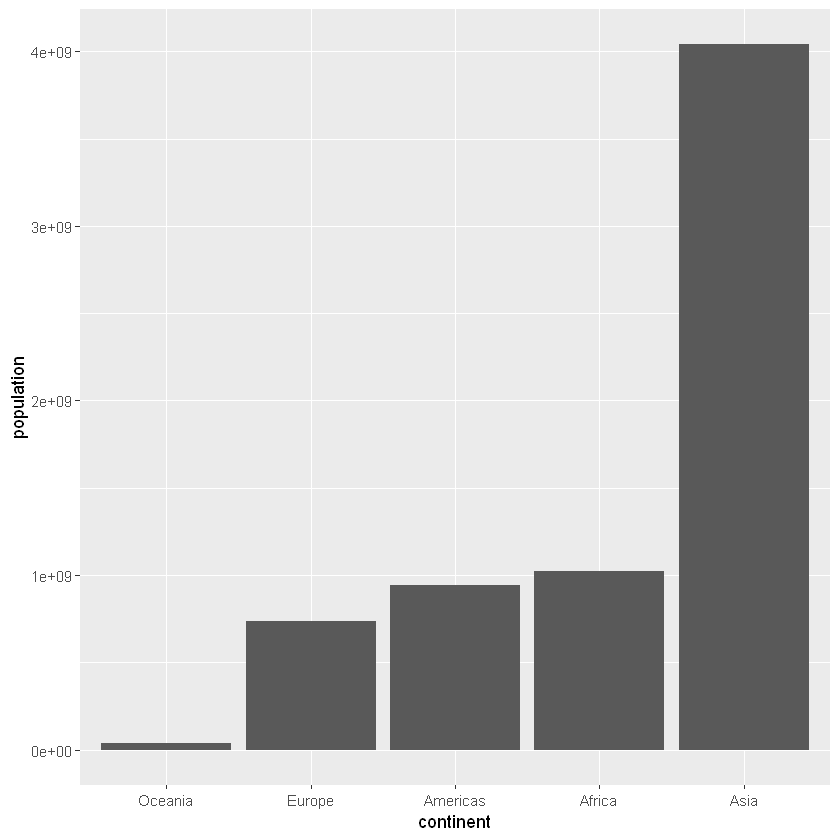

In [21]:
gapminder %>%
  filter(year==2010 & !is.na(population)) %>%
  mutate(continent=reorder(continent,population,FUN=sum)) %>%
  group_by(continent) %>%
  ggplot(aes(continent,population)) +
  geom_col()

Con un diagrama de cajas y bigotes, usando una escala logarítmica para el eje Y, añadiendo los puntos individuales y ordenando los continentes en función de sus medianas, se puede observa que no todos los países de Asia son tan poblados. Otro punto a destacar es como las poblaciones de los países África se asemejan a los de Asia si no se toman en cuenta las aportaciones de China e India. 

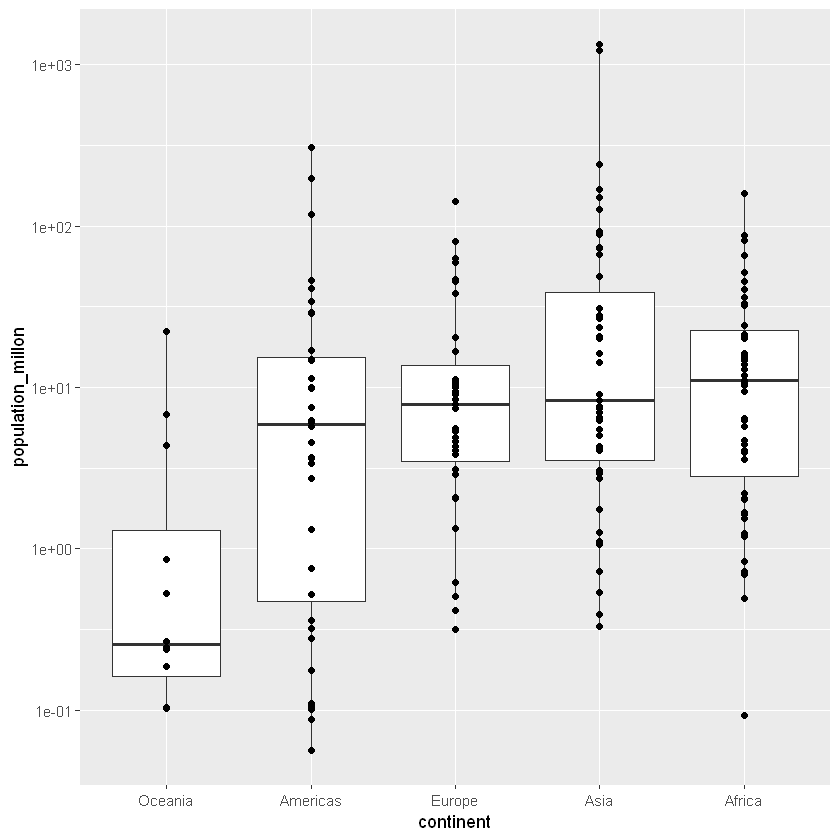

In [22]:
gapminder %>%
  filter(year==2010 & !is.na(population)) %>%
  mutate(population_millon=population/1000000) %>%
  mutate(continent=reorder(continent,population,FUN=median)) %>%
  group_by(continent) %>%
  ggplot(aes(continent,population_millon)) +
  geom_boxplot()+
  geom_point()+
  scale_y_continuous(trans="log10")

Otro ejemplo de cajas y bigotes pero ahora con homicidos con arma de fuego en Estados Unidos. Los datos están agrupados por región de ese país.

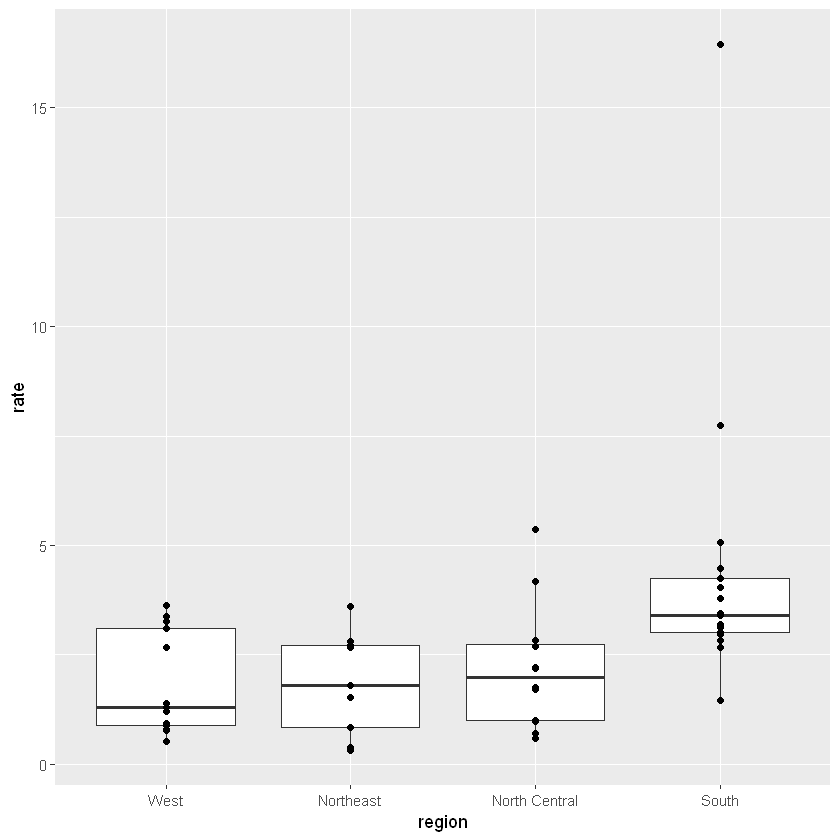

In [23]:
data("murders")
murders %>% 
  mutate(rate = total/population*100000) %>% 
  mutate(region=reorder(region,rate,FUN=median)) %>% 
  group_by(region) %>% 
  ggplot(aes(region,rate))+ 
  geom_boxplot()+geom_point()

## Otros ejemplos de visualización 

En la siguiente gráfica se muestran las variaciones en la esperanza de vida para diferentes paises, para los años 2010 y 2015. Esta presentación nos permite identificar facilmente los progresos que han hecho los países estudiados en ese aspecto.

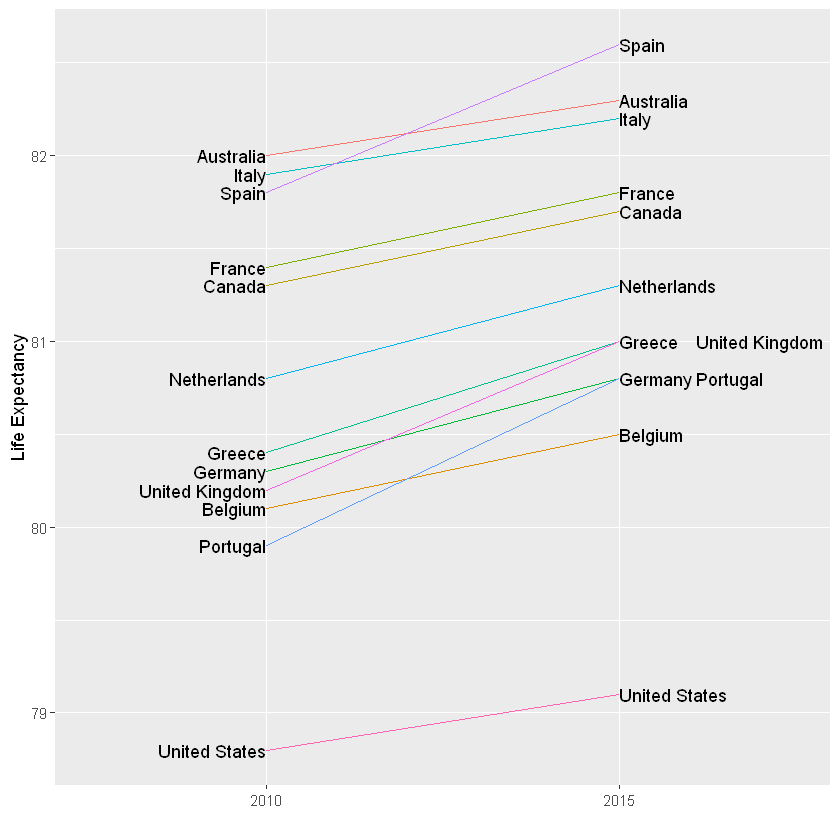

In [28]:
west <- c("Western Europe", "Northern Europe", "Southern Europe", "Northern America", "Australia and New Zealand")

gapminder %>%
  filter(year %in% c(2010, 2015) & region %in% west & !is.na(life_expectancy) & population > 10^7) %>%
  mutate(location = ifelse(year == 2010, 1, 2),
         location = ifelse(year == 2015 & country %in% c("United Kingdom", "Portugal"),
                           location + 0.22, location),
         hjust = ifelse(year == 2010, 1, 0)) %>%
  mutate(year = as.factor(year)) %>%
  ggplot(aes(year, life_expectancy, group = country)) +
  geom_line(aes(color = country), show.legend = FALSE) +
  geom_text(aes(x = location, label = country, hjust = hjust), show.legend = FALSE) +
  xlab("") +
  ylab("Life Expectancy") 

El siguiente comando genera una gráfica Bland-Altman, la cual muestra las diferencias contra el promedio de los datos. 

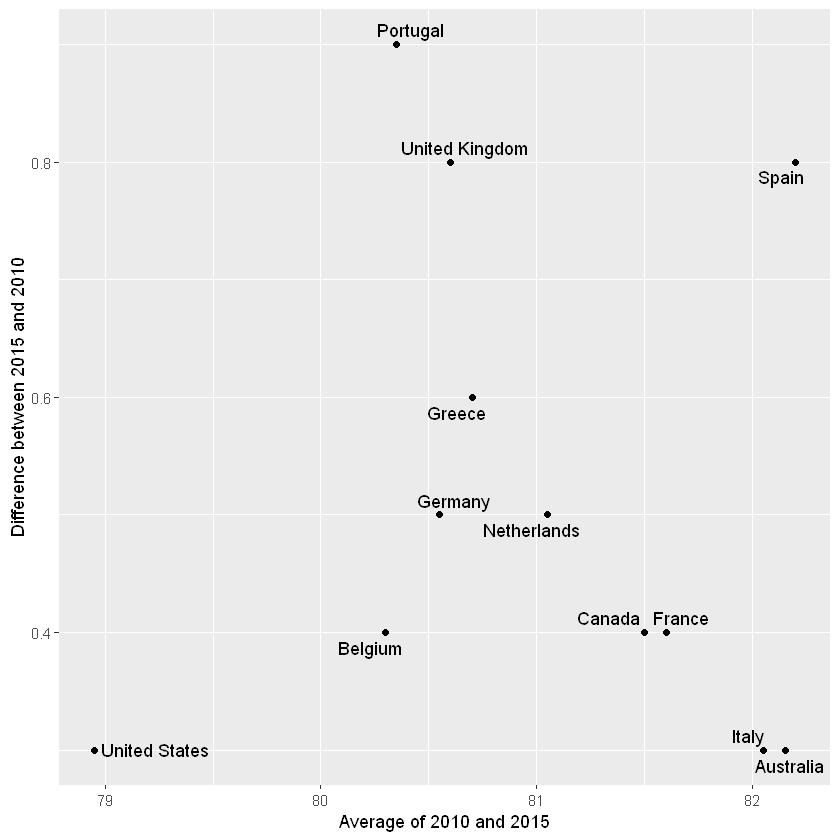

In [29]:
gapminder %>%
  filter(year %in% c(2010, 2015) & region %in% west & !is.na(life_expectancy) & population > 10^7) %>%
  mutate(year = paste0("life_expectancy_", year)) %>%
  select(country, year, life_expectancy) %>% spread(year, life_expectancy) %>%
  mutate(average = (life_expectancy_2015 + life_expectancy_2010)/2,
         difference = life_expectancy_2015 - life_expectancy_2010) %>%
  ggplot(aes(average, difference, label = country)) +
  geom_point() +
  geom_text_repel() +
  geom_abline(lty = 2) +
  xlab("Average of 2010 and 2015") +
  ylab("Difference between 2015 and 2010")

## Datos sobre las vacunas

Actualmente hay mucha controversia sobre el uso de las vacunas, la ciencia de datos puede ser una buena herramienta para demostrar como su uso ha salvado millones de vida a lo largo de los años. La base de datos (us_contagious_diseases) contiene los registros de incidencia de diferentes enfermedades en los Estados Unidos. En la siguiente gráfica se muestra la incidencia del sarampión en ese país, marcándose con una línea azul el año de 1963 que fue cuando se introdujo la vacuna contra esa enfermedad. Como se puede observar, la incidencia del sarampión disminuyó a partir del año en que la vacuna fue introducida. 

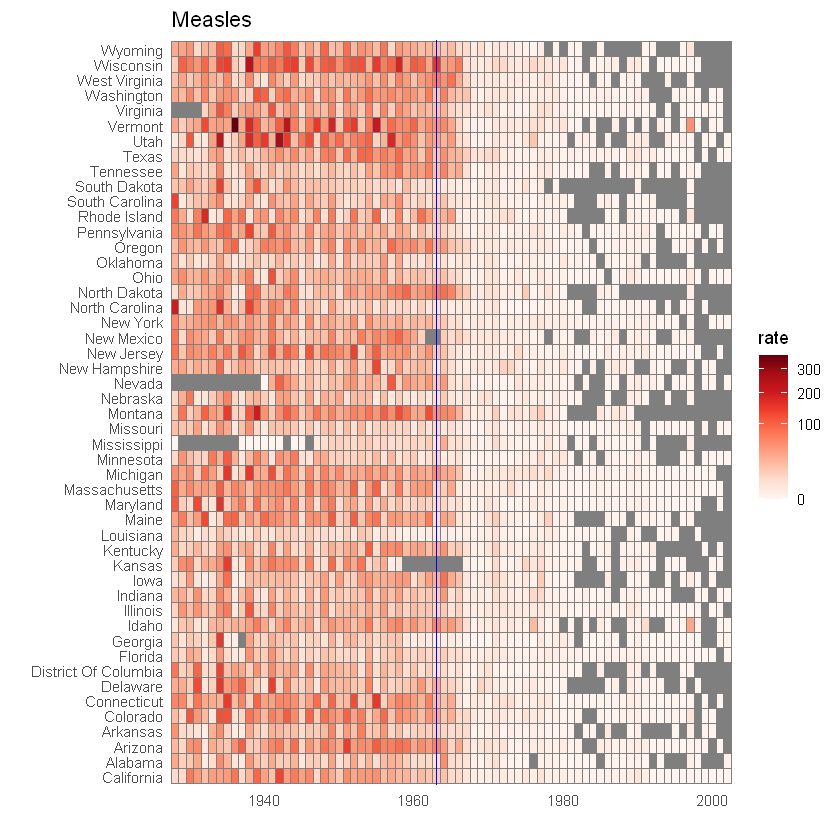

In [30]:
data(us_contagious_diseases)
the_disease = "Measles"

us_contagious_diseases %>%
  filter(!state %in% c("Hawaii", "Alaska") & disease == the_disease) %>%
  mutate(rate = count / population * 10000 * 52/weeks_reporting) %>%
  mutate(state = reorder(state, rate)) %>% 
  ggplot(aes(year, state, fill=rate)) +
  geom_tile(color = "grey50") +
  scale_x_continuous(expand = c(0,0)) +
  scale_fill_gradientn(colors = RColorBrewer::brewer.pal(9, "Reds"), trans = "sqrt") +
  geom_vline(xintercept = 1963, col = "blue") +
  theme_minimal() + theme(panel.grid = element_blank()) +
  ggtitle(the_disease) +
  ylab("") +
  xlab("")

Por último se presentan los datos por estado con una serie de tiempo, utilizando una línea negra para representar el promedio nacional. 

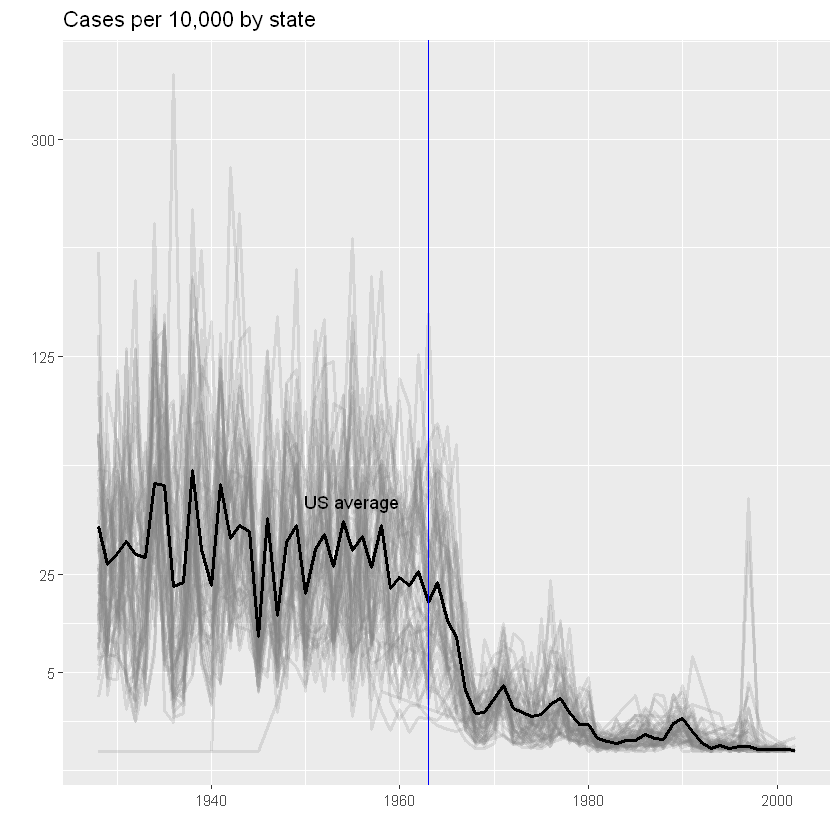

In [31]:
# Promedio nacional
avg <- us_contagious_diseases %>%
  filter(disease == the_disease) %>% group_by(year) %>%
  summarize(us_rate = sum(count, na.rm = TRUE)/sum(population, na.rm = TRUE)*10000)


us_contagious_diseases %>%
  filter(!state %in% c("Hawaii", "Alaska") & disease == the_disease) %>%
  mutate(rate = count / population * 10000 * 52/weeks_reporting) %>%
  mutate(state = reorder(state, rate)) %>%
  filter(!is.na(rate)) %>%
  ggplot() +
  geom_line(aes(year, rate, group = state), color = "grey50", 
            show.legend = FALSE, alpha = 0.2, size = 1) +
  geom_line(mapping = aes(year, us_rate), data = avg, size = 1, col = "black") +
  scale_y_continuous(trans = "sqrt", breaks = c(5, 25, 125, 300)) +
  ggtitle("Cases per 10,000 by state") +
  xlab("") +
  ylab("") +
  geom_text(data = data.frame(x = 1955, y = 50),
            mapping = aes(x, y, label = "US average"), color = "black") +
  geom_vline(xintercept = 1963, col = "blue")
